
_© Mohammad M. Ajallooeian, All Rights Reserved._

This notebook was created for educational purposes and parts of it is the intellectual property of Mohammad M. Ajallooeian. Generative AI tools, including but not limited to ChatGPT, DALL·E, Midjourney, and Gemini, may have been utilized in the creation of this notebook to generate content, visualizations, or other elements. All content generated has been verified and edited to ensure accuracy and educational value. Unauthorized reproduction or distribution of this material is prohibited without prior written permission from the author.

---

# CMPT 3520 Machine Learning II Course Project: Counting and Detecting LEGO Pieces

## Phase 1: Classical Computer Vision Techniques for LEGO Piece Counting

### 1.1 Introduction and Overview of Image Segmentation

#### Background

In this project, you'll explore traditional computer vision techniques to detect and classify LEGO pieces based on color and shape. [Image segmentation](https://en.wikipedia.org/wiki/Image_segmentation) is a fundamental technique in computer vision that divides an image into meaningful segments, making it easier to analyze and understand. We will start with an overview of segmentation methods and how they can be applied to images of LEGO pieces.

<img src='https://drive.google.com/uc?id=1hoLExpZ8jPBfbxlNEqe4xYEAPukLGA6z' width="1000">

[Photo](https://www.flickr.com/photos/195664105@N04/52082513197) by Kotwel Inc. [CC BY 2.0](https://creativecommons.org/licenses/by/2.0/)


# Objective

Your task is to experiment with three segmentation techniques and determine which one is best suited for this project. By the end of this section, you should have a clear understanding of how these techniques work and be prepared to apply them to the LEGO dataset provided.

##### Segmentation Techniques Overview

We will explore the following three segmentation methods:
1. **Thresholding**: This method uses a threshold value to convert an image to a binary form, separating the object from the background.
2. **Edge Detection**: This technique identifies edges within the image, helping to outline the shapes of the LEGO pieces.
3. **Color-Based Segmentation**: Unlike the previous two, this method uses color information to segment the image based on different color regions.

Each technique has its strengths and limitations, which we will explore in this project.

**What to do**:

1. Read through the overview of the three segmentation techniques.
2. Try to think about how each technique might apply to counting and classifying LEGO pieces.
3. Feel free to look up additional information on each method if you’re curious!
Before we begin, let's talk about a package we will use: OpenCV.

### Data
Before we get started, let's talk about the data we will be using for this phase of the project. For the first phase of the project, you will be working with a set of images of lego pieces located [here](https://photos.google.com/share/AF1QipPJmj17ZeMqKIVm06ZEKDP9BL2oAj0NeHLojGNoXcHGWKki_Hf3JbLpbMkOd6Da2w?key=ZU1NNjk2Sl9QMW4zQXN3bTNCV2FIMDVLOXNjMTlB).

- Download the images and put all of them in a folder called `Photos` within the folder you have your project file in. You can download all of the images by using the 'Download all' option under the three dots in the upper right corner. This will give you a compressed zip file which you can expand to get the images.
- You should **save a copy of this file on your own Drive and replace `Student` in parentheses in the name of this notebook with names of members of your team** before doing anything else. Google Drive (and Colab) will not allow you to save over this file and any changes you make will be lost.
- For this notebook to work correctly on your own Drive, also downlaod [this file](https://drive.google.com/file/d/1Q1qV2M1vsd3QsrzxbZgq-cv7luqoEd0j/view?usp=sharing) and put it in the same directory the notebook is. Your folder should look similar to this:
<img src='https://drive.google.com/uc?id=1oFwbAIR7GQcIgjPdriGMKGrcRjqmede9'>
Here, the Photos folder contains 33 image files.
- Provide access permission to Colab to be able to access your Google Drive.
- Modify the path below to reflect where the directory in which you have your copy of the project notebook file (this file) is:


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Now, we can start talking about a tool you can use for computer vision tasks.

In [2]:
root_path = '/content/drive/MyDrive/CMPT_3520_Project'


---

### Introduction to OpenCV

In this project, you have the flexibility to choose whichever computer vision library or package you prefer. However, we recommend **OpenCV** as a reliable and well-supported option, especially for classical image processing and computer vision tasks.

#### What is OpenCV?

OpenCV (Open Source Computer Vision Library) is a popular open-source library that provides a comprehensive set of tools and algorithms for computer vision and image processing. OpenCV supports a wide range of programming languages, including Python, C++, Java, and MATLAB, and is highly efficient for real-time image and video processing.

With OpenCV, you can accomplish tasks such as:
- **Image Processing**: Reading, writing, and manipulating images.
- **Feature Detection and Matching**: Identifying key points in images and matching them across different images.
- **Object Detection and Recognition**: Locating objects within images or videos using techniques like face detection.
- **Video Analysis**: Working with video files and live streams to perform motion tracking, background subtraction, and more.

OpenCV is widely used in industry and academia due to its versatility, efficiency, and extensive documentation.


#### Basic Examples of Computer Vision Tasks with OpenCV

In [3]:
# Import necessary libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

To get a sense of how OpenCV works, here are some basic tasks that it can handle:

1. **Reading and Displaying an Image**:
   - OpenCV can load an image from a file, process it, and display it.

In [4]:
import os
print(os.listdir(root_path))

['lego_image.jpg', 'Photos', 'Copy of Copy of Machine Learning II Project (Lovepreet_Rajveer_Bandhandeep_Harshdeep).ipynb']


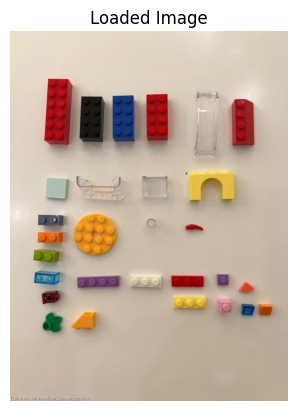

In [5]:
# Load an image from file
image = cv.imread(root_path + '/lego_image.jpg')

def show_color_image(image, title, show=True):

    # Convert the image from BGR to RGB color space
    # OpenCV loads images in BGR format by default, while Matplotlib expects RGB format.
    image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(image_rgb)

    # Set the title of the displayed image
    plt.title(title)

    # Remove the axis ticks and labels for a cleaner view of the image
    plt.axis('off')

    # Display the image with the above configurations
    if show:
        plt.show()

show_color_image(image, "Loaded Image")

[Photo ](https://www.pabfinder.com/stores/fr/paris-les-halles/photos/afbcff31-1693-4fab-9ff7-5d317f6912c2) by Kuri [CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/)


2. **Resizing and Cropping an Image**:
   - OpenCV provides easy methods to resize and crop images, allowing you to adjust image dimensions as needed.

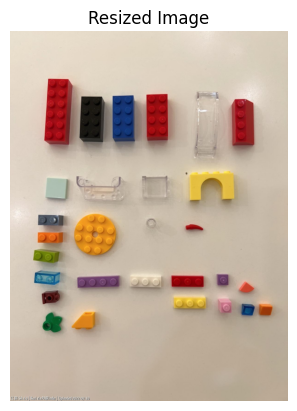

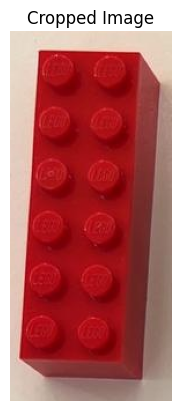

In [6]:
# Resize the image to half its original size
resized_image = cv.resize(image, (0, 0), fx=0.5, fy=0.5)
show_color_image(resized_image, "Resized Image")


# Crop a region of interest (ROI) from the image
cropped_image = image[190:510, 140:280]  # Define a rectangular area to crop
show_color_image(cropped_image, "Cropped Image")

3. **Applying a Gaussian Blur**:
   - Blurring is commonly used to reduce noise before further processing.

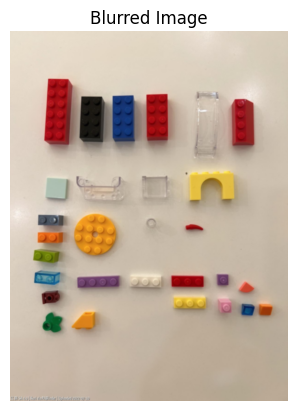

In [7]:
# Apply Gaussian Blur to the image
blurred_image = cv.GaussianBlur(image, (7, 7), 1.5)
show_color_image(blurred_image, "Blurred Image")

4. **Edge Detection with the Canny Edge Detector**:
   - OpenCV’s Canny Edge Detector is a popular tool for detecting the edges of objects within an image.

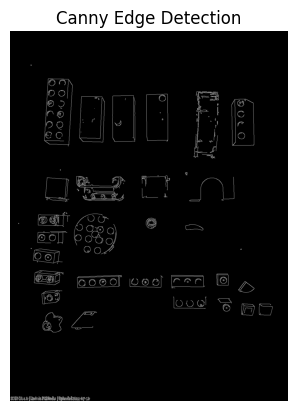

In [8]:
# Convert to grayscale
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Apply Canny Edge Detection
edges = cv.Canny(gray_image, 50, 150)

def show_gray_image(image, title, show=True):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    if show:
        plt.show()

# Display the edge-detected image
show_gray_image(edges, "Canny Edge Detection")

#### Why Choose OpenCV?

OpenCV is recommended for this project because it provides robust tools for both traditional and advanced computer vision tasks. Its extensive functionality and optimized performance make it ideal for real-time applications. Additionally, OpenCV has a large user community, which means there are plenty of tutorials, guides, and resources to help you along the way.

Feel free to explore OpenCV or any other library you are comfortable with. OpenCV, however, can serve as a great option for tackling the LEGO piece counting tasks in this project.

---

If you need further information about computer vision take a look at [Computer Vision: Algorithms and Applications, 2nd ed. by Richard Szeliski](https://szeliski.org/Book/).

---


Now, let's move on to exploring the first segmentation technique: thresholding.

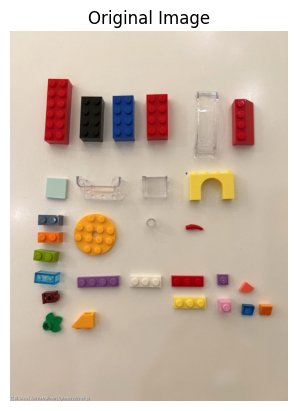

In [9]:
image = cv.imread(root_path + '/lego_image.jpg')

show_color_image(image, "Original Image")


### 1.2 Applying Thresholding for Image Segmentation

#### Overview of Thresholding

Thresholding is a simple yet powerful technique for segmenting an image based on pixel intensity. It converts an image to a binary form, where pixels above a certain threshold are set to one value (white), and those below are set to another (black). This makes it easier to distinguish objects from the background.

#### Types of Thresholding

1. **Global Thresholding**: Applies a single threshold value across the entire image.
2. **Adaptive Thresholding**: Calculates a different threshold for smaller regions of the image, useful when the lighting varies across the image.

In this section, we will implement both types of thresholding and experiment with different parameters to find the most effective settings for the LEGO images.

---

### Instructions for This Section

1. **Implement Global and Adaptive Thresholding**:
   - Use OpenCV’s `cv.threshold()` for global thresholding.
   - Use `cv.adaptiveThreshold()` for adaptive thresholding.
   - [Documentation](https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html)
2. **Experiment with Parameters**:
   - For global thresholding, try different values and find an optimal threshold.
   - For adaptive thresholding, test different block sizes and `C` values (constant subtracted from the mean).
3. **Visualize and Analyze Results**:
   - Plot the original image and the thresholded images side by side.
   - Analyze how well each method segments the LEGO pieces from the background.

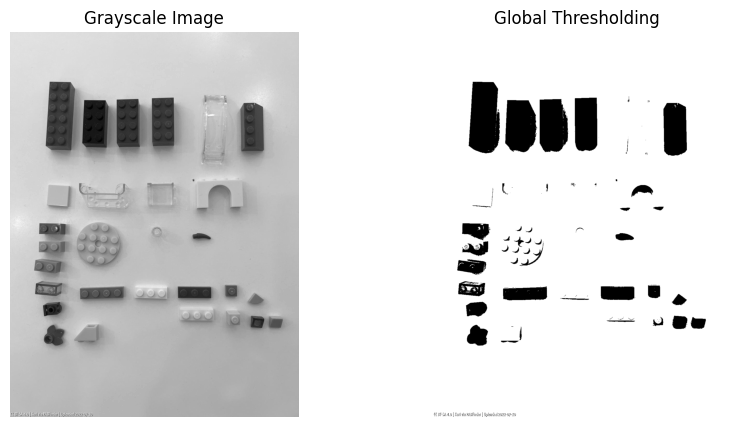

In [10]:
# Global Thresholding Example
# Convert the image to grayscale
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Apply global thresholding
_, global_thresh = cv.threshold(gray_image, 127, 255, cv.THRESH_BINARY)

# Display the result
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
show_gray_image(gray_image, "Grayscale Image", show=False)

plt.subplot(1, 2, 2)
show_gray_image(global_thresh, "Global Thresholding", show=True)

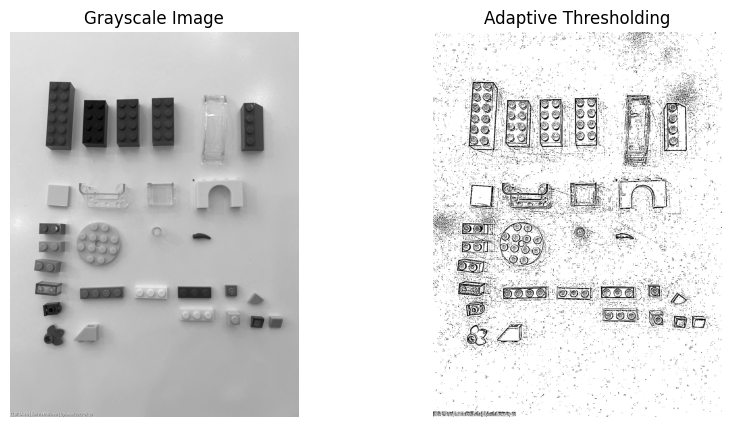

In [11]:
# Adaptive Thresholding Example
# Apply adaptive thresholding
adaptive_thresh = cv.adaptiveThreshold(
    gray_image, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv.THRESH_BINARY, 11, 2
)

# Display the result
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
show_gray_image(gray_image, "Grayscale Image", show=False)

plt.subplot(1, 2, 2)
show_gray_image(adaptive_thresh, "Adaptive Thresholding", show=True)

### 1.3 Applying Edge Detection for Image Segmentation

#### Overview of Edge Detection

Edge detection is a technique used to identify the boundaries of objects within an image. By detecting edges, we can outline the shapes of LEGO pieces and differentiate them from the background. One popular edge detection algorithm is the **Canny Edge Detector**, which we will use in this section.

#### How the Canny Edge Detector Works

The Canny Edge Detector is a multi-step algorithm that involves:
1. **Noise Reduction**: Blurring the image to reduce noise and prevent false edge detection.
2. **Gradient Calculation**: Calculating the intensity gradients of the image to detect areas of rapid intensity change.
3. **Non-Maximum Suppression**: Thinning the edges to ensure only the strongest edges are kept.
4. **Edge Tracking by Hysteresis**: Using two threshold values to identify and connect edge pixels, ensuring clean edge lines.

By the end of this section, you will be able to apply the Canny Edge Detector to segment LEGO pieces based on their outlines.

---

### Instructions for This Section

1. **Implement Canny Edge Detection**:
   - Use OpenCV’s `cv.Canny()` function to detect edges in the grayscale image.
   - Experiment with different threshold values to find settings that highlight the LEGO pieces effectively.
   - [Documentation](https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html)
2. **Visualize and Analyze Results**:
   - Plot the original grayscale image alongside the edge-detected image to compare.
   - Evaluate how well the detected edges represent the shapes of the LEGO pieces.

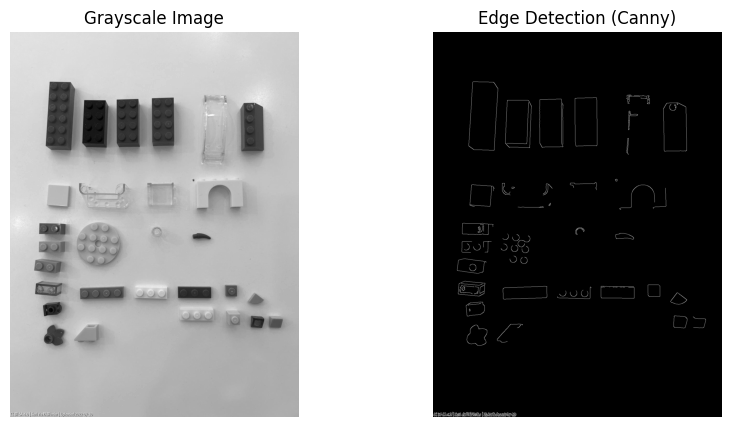

In [12]:
# Apply Gaussian Blur to reduce noise before edge detection
blurred_image = cv.GaussianBlur(gray_image, (5, 5), 1.4)

# Apply Canny Edge Detection
# Adjust the threshold values as needed to highlight the LEGO pieces
edges = cv.Canny(blurred_image, 50, 150)

# Display the original grayscale image and the edge-detected image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title("Edge Detection (Canny)")
plt.axis('off')

plt.show()

### 1.4 Applying Color-Based Segmentation for Image Segmentation

#### Overview of Color-Based Segmentation

Unlike thresholding and edge detection, which often rely on grayscale images, color-based segmentation uses color information to distinguish different regions. This can be especially effective when objects (like LEGO pieces) have distinct colors.

#### Introduction to RG Chromaticity

One method of color-based segmentation is **RG Chromaticity**, which uses normalized color components to reduce the impact of lighting variations. The RG Chromaticity transformation calculates normalized red and green components while discarding the blue channel.

The RG Chromaticity values can be calculated as:
- $ r = \frac{R}{R + G + B} $
- $ g = \frac{G}{R + G + B} $

By focusing on these normalized values, we can effectively segment objects based on color despite differences in lighting.

#### Color-Based Segmentation as a Region-Based Technique

Color-based segmentation is a type of **region-based segmentation**. In region-based segmentation, the objective is to group pixels into regions based on shared characteristics, such as color, texture, or intensity. For color-based segmentation, regions are formed based on similarities in color, making it particularly useful for images where objects are easily distinguishable by color. By leveraging color as the primary characteristic, this method segments regions in a way that is less sensitive to lighting conditions, as exemplified by RG Chromaticity, which normalizes color values to enhance accuracy.

---

### Instructions for This Section

1. **Convert the Image to RG Chromaticity**:
   - Calculate the normalized red and green channels as described.
   - Create a new image using these two channels for color segmentation.
2. **Apply Thresholding on Chromaticity Image**:
   - Use thresholding or clustering (such as k-means) on the RG chromaticity channels to identify distinct color regions.
3. **Visualize and Analyze Results**:
   - Plot the RG Chromaticity image and the segmented image to observe how well the LEGO pieces are separated by color.
   - Analyze the effectiveness of this method compared to the previous segmentation techniques.

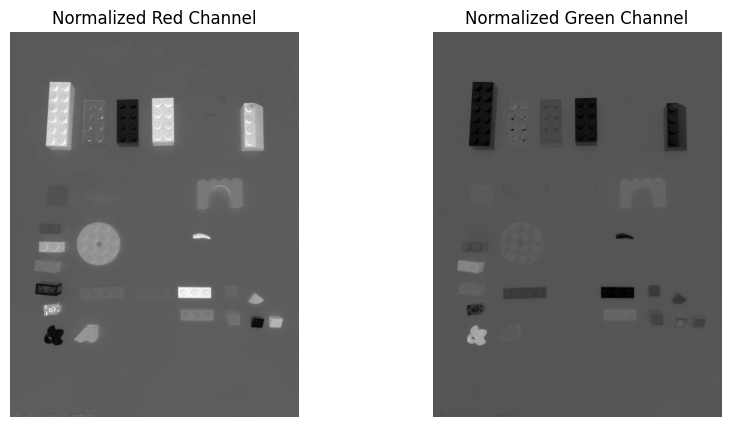

In [13]:
# Convert the image to float type for accurate calculations
image_float = image.astype(float)

# Separate the color channels
R = image_float[:, :, 2]
G = image_float[:, :, 1]
B = image_float[:, :, 0]

# Calculate RG Chromaticity
sum_channels = R + G + B + 1e-6  # Add a small value to avoid division by zero
r = R / sum_channels
g = G / sum_channels

# Display the RG Chromaticity image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
show_gray_image(r, "Normalized Red Channel", show=False)

plt.subplot(1, 2, 2)
show_gray_image(g, "Normalized Green Channel", show=True)

plt.show()

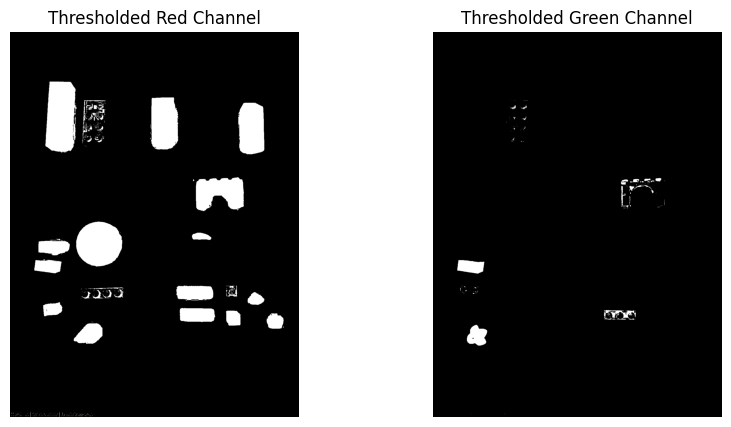

In [14]:
# Apply Thresholding on RG Chromaticity Channels
# Example: Threshold the normalized red channel to isolate red LEGO pieces
_, red_thresh = cv.threshold((r * 255).astype(np.uint8), 100, 255, cv.THRESH_BINARY)
_, green_thresh = cv.threshold((g * 255).astype(np.uint8), 100, 255, cv.THRESH_BINARY)

# Display the thresholded red and green channels
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
show_gray_image(red_thresh, "Thresholded Red Channel", show=False)

plt.subplot(1, 2, 2)
show_gray_image(green_thresh, "Thresholded Green Channel", show=True)

plt.show()

### 1.5 Putting Everything Together

#### Systematic Thresholding Using Histograms

A systematic approach to selecting a threshold for segmentation involves using histograms, which can help visualize the distribution of pixel values. This can be applied to any method that relies on thresholding. By examining histograms, we can make more informed choices rather than guessing thresholds blindly.

**Instructions**:

1. **Explore Histograms**:
   - For each segmentation method that involves thresholding, calculate and plot the histogram of the relevant pixel values.
   - Use these histograms to determine a suitable threshold for each method systematically.

2. **Automated Threshold Detection**:
   - Instead of manually selecting thresholds, implement a method to automatically detect suitable thresholds, such as Otsu’s method. This will further enhance the systematic approach across different segmentation techniques.

#### Image Pre-Processing for Enhanced Segmentation

Pre-processing images is a common step before applying segmentation, as it can improve the quality of the segmentation results. Various techniques, such as histogram equalization, white balancing, and contrast enhancement, can help enhance the image by improving contrast, balancing lighting, and correcting color biases.

**Instructions**:

1. **Image Pre-Processing Techniques**:
   - Apply **histogram equalization** to enhance contrast. Refer to [OpenCV’s histogram equalization tutorial](https://docs.opencv.org/4.x/d5/daf/tutorial_py_histogram_equalization.html) for guidance.
   - Try **white balancing** to adjust the color balance and lighting of the image. Check [this guide on white balancing](https://jmanansala.medium.com/image-processing-with-python-color-correction-using-white-balancing-6c6c749886de) for more information.
   - Use **contrast enhancement** to further highlight details. You can learn more about enhancing contrast from [this resource](https://docs.opencv.org/3.4/d3/dc1/tutorial_basic_linear_transform.html).

2. **Systematic Exploration of Pre-Processing**:
   - Test each of these pre-processing methods before applying segmentation.
   - Compare and analyze the effects of each method, noting which leads to the most effective segmentation.

3. **Contour Detection**:
   - After thresholding, apply contour detection to identify distinct LEGO pieces in the image. You can use the [OpenCV contour detection guide](https://docs.opencv.org/3.4/d3/d05/tutorial_py_table_of_contents_contours.html).
   - Display the detected contours overlaid on the original color image. For visibility, use **bright yellow** to plot the contours.

4. **Filtering Incorrect Contours**:
   - Examine the contours to identify any that don’t correspond to LEGO pieces (e.g., very small or very large contours). These can be filtered based on contour size.
   - Tip: Use the contour area (there is a function contourArea() that does that) comparative to picture size to decide whether to keep or discard each contour.

5. **Counting the Contours**:
   - After filtering, count the valid contours to estimate the number of LEGO pieces in the image.


---

### Deliverables for This Phase:

- **Explanation and Analysis**: Describe your process for choosing thresholds systematically, using histograms across different segmentation methods. Compare various pre-processing techniques and their effectiveness.
- **Visualizations**: Provide histograms, pre-processed images, and overlayed contours on the color image for each approach.
- **Contour Detection and Filtering**: Report the detected contours, explain which were filtered out, and include the final count of LEGO pieces.

---

### Rubric (70 Marks Total)

- **Histogram-Based Thresholding and Edge Detection Parameters (20 Marks)**:
  - Proper calculation and visualization of histograms for each method (10 marks)
  - Explanation of good thresholds and parameters for edge detection based on histograms and method-specific analysis (10 marks)

- **Automated Threshold Detection (10 Bonus Marks)**:
  - Implementation of automated threshold detection (5 bonus marks)
  - Analysis of the effectiveness compared to manual thresholding (5 bonus marks)

- **Pre-Processing Techniques (20 Marks)**:
  - Application of histogram equalization, white balancing, and contrast enhancement (5 marks each for successful implementation)
  - Comparative analysis of pre-processing methods (5 marks)

- **Contour Detection and Visualization (15 Marks)**:
  - Accurate contour detection and overlay on color image (15 marks)

- **Filtering Incorrect Contours (10 Marks)**:
  - Effective filtering of contours based on contour size (10 marks)

- **Counting Contours (5 Marks)**:
  - Accurate counting of contours, with explanations for any filtered contours (3 marks)

| Criteria                                            | Excellent (Full Marks)                                          | Good (Partial Marks)                                        | Needs Improvement (Few or No Marks)               |
|-----------------------------------------------------|-----------------------------------------------------------------|-------------------------------------------------------------|---------------------------------------------------|
| **Thresholding and Edge Detection Parameters**      | Provides accurate histograms for each method and thoroughly explains thresholds and parameters for edge detection based on histogram analysis. (10 Marks) | Histograms, thresholds, and edge detection parameters are mostly accurate, with minor omissions or inaccuracies. (5-9 Marks) | Inaccurate histograms or insufficient explanation of thresholds and edge detection parameters. (0-4 Marks) |
| **Automated Threshold Detection (Bonus)**           | Implements automated detection effectively and provides a detailed analysis compared to manual methods. (10 Bonus Marks) | Implementation is partially correct or lacks thorough comparison to manual methods. (5-9 Bonus Marks) | Incorrect implementation or missing analysis. (0-4 Bonus Marks)             |
| **Pre-Processing Techniques**                       | Successfully applies histogram equalization, white balancing, and contrast enhancement with a detailed comparative analysis. (12 Marks) | Applies pre-processing techniques with some minor inaccuracies or lacks detailed analysis. (6-11 Marks) | Incorrect or incomplete application of techniques with little to no analysis. (0-5 Marks) |
| **Contour Detection and Visualization**             | Accurately detects and overlays contours, using correct visualization techniques. (10 Marks) | Detects contours with some minor errors, or visualization lacks clarity. (5-9 Marks) | Incorrect contour detection or poor visualization. (0-4 Marks)             |
| **Filtering Incorrect Contours**                    | Effectively filters contours based on size, with appropriate reasoning. (5 Marks)           | Partially filters contours, with minor errors or insufficient reasoning. (3-4 Marks) | Incorrect or no filtering of contours, lacks justification. (0-2 Marks)     |
| **Counting Contours**                               | Accurately counts contours and provides clear explanation for filtered contours. (3 Marks)  | Counts contours with minor errors, or explanation is incomplete. (2 Marks) | Incorrect contour count or lacks explanation for filtering. (0-1 Mark)      |

*Note: The automated threshold detection is a bonus component, with an opportunity to earn up to an additional 10 marks.*

---

In [15]:
### Your code goes here.

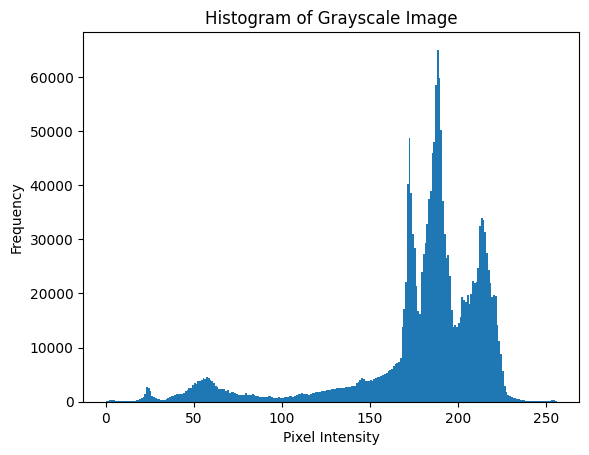

In [16]:
# Function to plot the histogram
def plot_histogram(image, title):
    plt.hist(image.ravel(), bins=256, range=(0, 256))
    plt.title(title)
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()
    # Display the histogram of the grayscale image to analyze pixel intensity distribution
plot_histogram(gray_image, "Histogram of Grayscale Image")

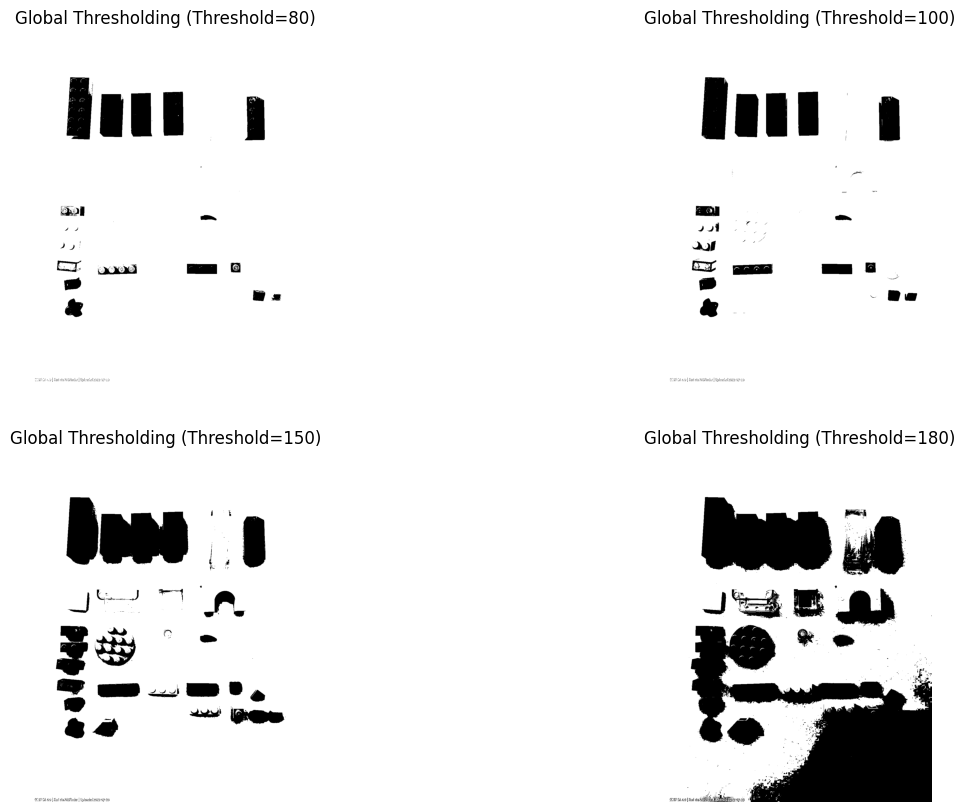

In [17]:
# Try different threshold values for global thresholding
threshold_values = [80, 100, 150, 180] #threshold values based on histogram peaks where we observe distinct intensity levels
                                       # This allows for better separation between background and objects in each case
plt.figure(figsize=(15, 10))

for i, threshold in enumerate(threshold_values):
  _, global_thresh = cv.threshold(gray_image, threshold, 255, cv.THRESH_BINARY)

  plt.subplot(2, 2, i + 1)
  plt.imshow(global_thresh, cmap='gray')
  plt.title(f"Global Thresholding (Threshold={threshold})")
  plt.axis('off')

plt.show()


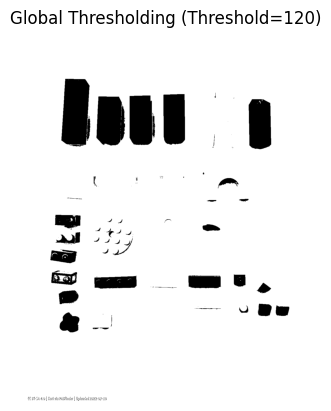

In [18]:
# Apply a chosen global threshold based on the histogram
_, global_thresh = cv.threshold(gray_image, 120, 255, cv.THRESH_BINARY)

# Visualize the global thresholded image

plt.imshow(global_thresh, cmap='gray')
plt.title("Global Thresholding (Threshold=120)")
plt.axis('off')
plt.show()

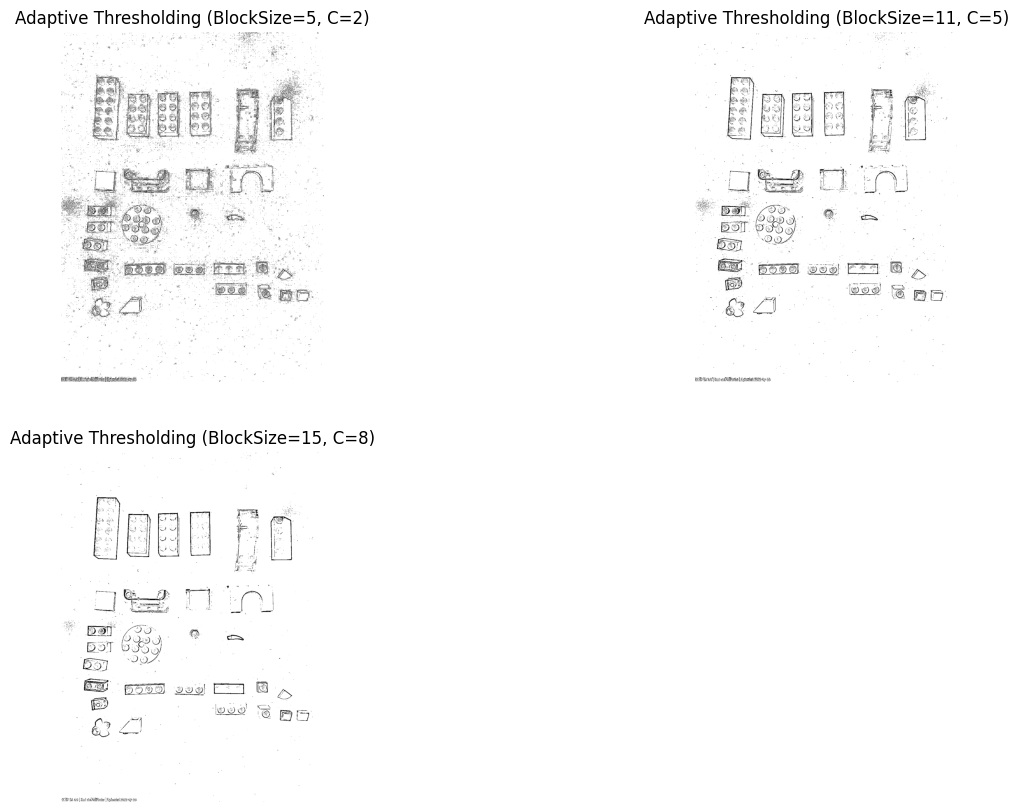

In [19]:
# Try different block sizes and C values for adaptive thresholding
block_sizes = [5, 11, 15]
c_values = [2, 5, 8]

plt.figure(figsize=(15, 10))

for i, (block_size, c_value) in enumerate(zip(block_sizes, c_values)):
  adaptive_thresh = cv.adaptiveThreshold(
      gray_image, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C,
      cv.THRESH_BINARY, block_size, c_value
  )

  plt.subplot(2, 2, i + 1)
  plt.imshow(adaptive_thresh, cmap='gray')
  plt.title(f"Adaptive Thresholding (BlockSize={block_size}, C={c_value})")
  plt.axis('off')

plt.show()

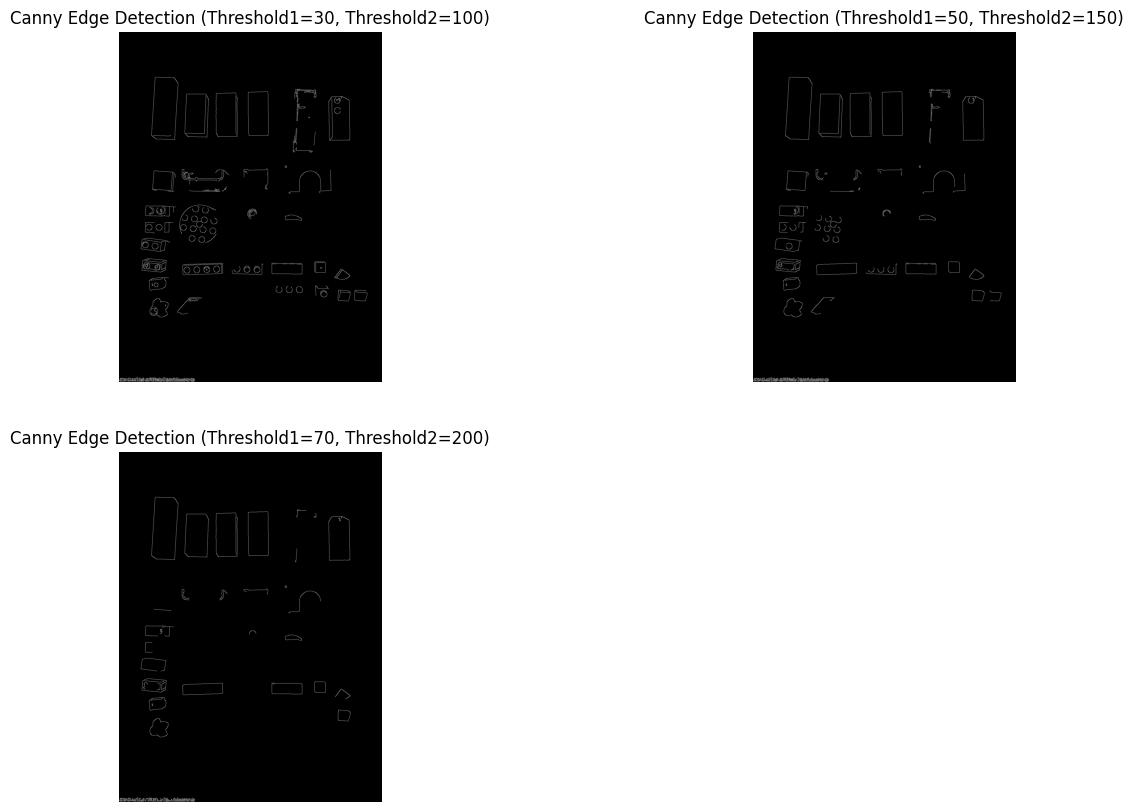

In [20]:
# Try different threshold values for Canny edge detection
threshold1_values = [30, 50, 70]
threshold2_values = [100, 150, 200]

plt.figure(figsize=(15, 10))

for i, (threshold1, threshold2) in enumerate(zip(threshold1_values, threshold2_values)):
  edges = cv.Canny(blurred_image, threshold1, threshold2)

  plt.subplot(2, 2, i + 1)
  plt.imshow(edges, cmap='gray')
  plt.title(f"Canny Edge Detection (Threshold1={threshold1}, Threshold2={threshold2})")
  plt.axis('off')

plt.show()

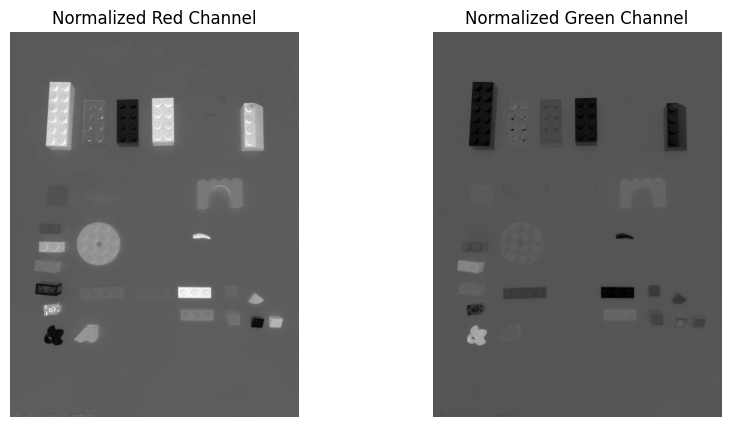

In [21]:
# Convert the image to float type for accurate calculations
image_float = image.astype(float)

# Separate the color channels
R = image_float[:, :, 2]
G = image_float[:, :, 1]
B = image_float[:, :, 0]

# Calculate RG Chromaticity
sum_channels = R + G + B + 1e-6  # Add a small value to avoid division by zero
r = R / sum_channels
g = G / sum_channels

# Display the RG Chromaticity image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
show_gray_image(r, "Normalized Red Channel", show=False)

plt.subplot(1, 2, 2)
show_gray_image(g, "Normalized Green Channel", show=True)

plt.show()

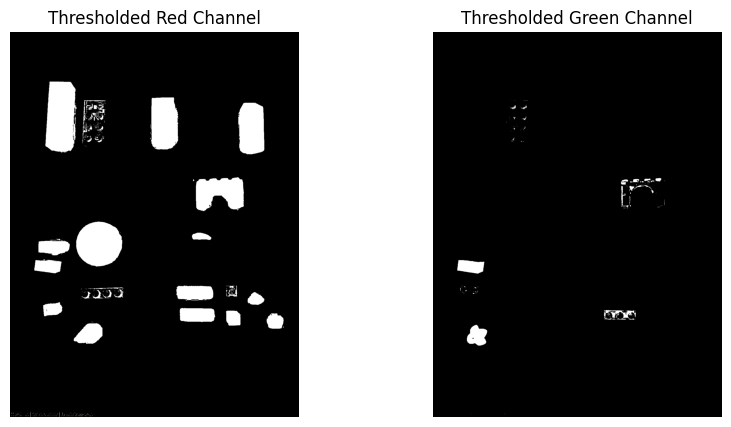

In [22]:
# Apply Thresholding on RG Chromaticity Channels
# Example: Threshold the normalized red channel to isolate red LEGO pieces
_, red_thresh = cv.threshold((r * 255).astype(np.uint8), 100, 255, cv.THRESH_BINARY)
_, green_thresh = cv.threshold((g * 255).astype(np.uint8), 100, 255, cv.THRESH_BINARY)

# Display the thresholded red and green channels
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
show_gray_image(red_thresh, "Thresholded Red Channel", show=False)

plt.subplot(1, 2, 2)
show_gray_image(green_thresh, "Thresholded Green Channel", show=True)

plt.show()

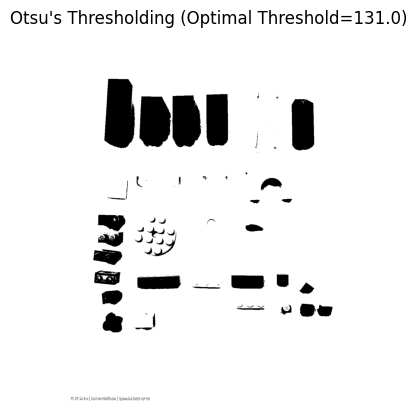

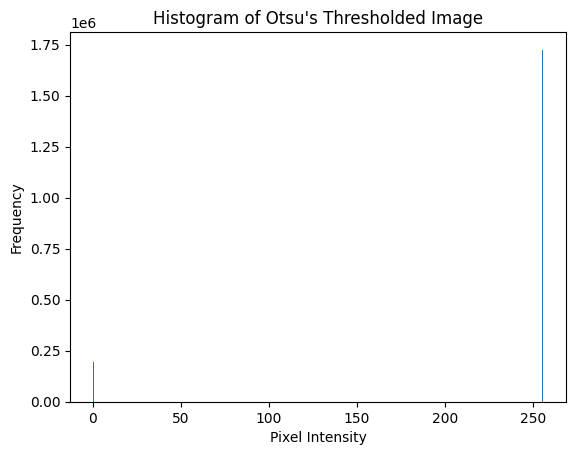

In [23]:
# Apply Otsu's method to find an optimal threshold automatically
_, otsu_thresh = cv.threshold(gray_image, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Display the result of Otsu's thresholding
plt.imshow(otsu_thresh, cmap='gray')
plt.title(f"Otsu's Thresholding (Optimal Threshold={_})")
plt.axis('off')
plt.show()

# Display histogram of Otsu's thresholded image
plot_histogram(otsu_thresh, "Histogram of Otsu's Thresholded Image")


#The histogram graph shown here is typical for a binary image generated through Otsu's thresholding. In Otsu’s method, the image is divided into two classes (foreground and background), resulting in two main pixel intensity values—usually near 0 and 255.

In [24]:

# Apply Gaussian blur to reduce noise
blurred_image = cv.GaussianBlur(gray_image, (5, 5), 0)

## Comparison of Manual (Global) vs. Automated (Otsu) Thresholding

Based on the results, we can compare the effectiveness of manually setting a global threshold versus using the automated Otsu's method for image segmentation.


**Explanation of Results:**

* **Manual Thresholding:** In this approach, we visually examine the image histogram and select a threshold value that separates the objects (LEGO pieces) from the background. In the example, we selected a threshold of 120. This approach requires subjective judgment and may not be optimal for images with varying lighting or complex backgrounds. The resulting image shows a binary image where pixels above 120 are white and below are black. However, it might not accurately separate the objects if the lighting in the image is uneven or the objects have varying brightness.
* **Automated Otsu's Thresholding:** Otsu's method is an automated algorithm that calculates the optimal threshold based on minimizing the intra-class variance and maximizing the inter-class variance. This approach removes the need for manual selection and is particularly advantageous when dealing with images with varying brightness or complex backgrounds. In the example, Otsu's method automatically determined a threshold that best separated the objects from the background, resulting in a cleaner and more accurate segmentation compared to the manually chosen threshold. The resulting image shows a binary image where objects are well separated.


**Comparison:**

While manual thresholding allows for some degree of control, Otsu's method often provides better results, especially for images with varied lighting or complex backgrounds. It automates the threshold selection process, leading to more accurate and consistent segmentation.

**Which one is better for this problem?**

For the problem of segmenting LEGO pieces from the background, Otsu's method is likely to provide better results due to its ability to handle varying brightness and complex backgrounds that can be present in the images. Manual thresholding may be sufficient if the images have consistent lighting and simple backgrounds, but Otsu's method is a more robust and reliable solution for this problem.



In summary, Otsu's automated thresholding is a preferred choice over manual thresholding in this case due to its ability to find a globally optimal threshold for the image, leading to better object segmentation with less human intervention.

**Impact of Each Technique following below:**
- **Histogram Equalization**: Redistributes pixel intensity values to improve contrast, useful for low-contrast images but may amplify noise in darker areas.
- **White Balancing**: Adjusts color balance, particularly helpful in images with colored lighting, to make colors appear more natural.
- **CLAHE**: Enhances local contrast, reducing the risk of noise amplification by limiting contrast in high-density regions, which is beneficial for images with varied lighting.


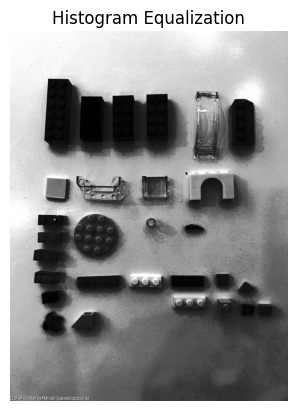

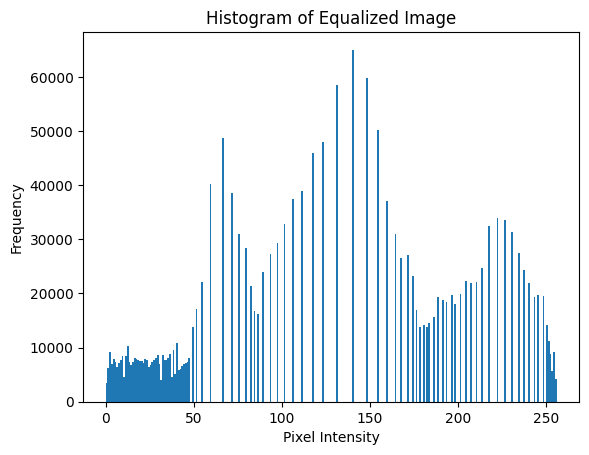

In [25]:
# Apply histogram equalization to enhance contrast
equalized_image = cv.equalizeHist(gray_image)

# Display the equalized image and its histogram
plt.imshow(equalized_image, cmap='gray')
plt.title("Histogram Equalization")
plt.axis('off')
plt.show()
plot_histogram(equalized_image, "Histogram of Equalized Image")


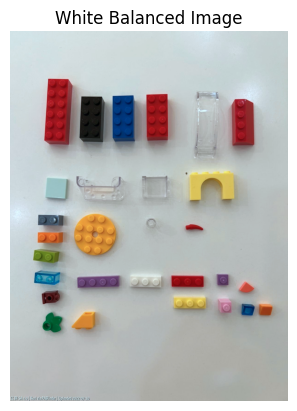

In [26]:
# Function for simple white balancing
def white_balance(img):
    result = cv.cvtColor(img, cv.COLOR_BGR2LAB)
    avg_a = result[:, :, 1].mean()
    avg_b = result[:, :, 2].mean()
    result[:, :, 1] = result[:, :, 1] - ((avg_a - 128) * (result[:, :, 0] / 255.0) * 1.1)
    result[:, :, 2] = result[:, :, 2] - ((avg_b - 128) * (result[:, :, 0] / 255.0) * 1.1)
    return cv.cvtColor(result, cv.COLOR_LAB2BGR)

# Apply white balancing
white_balanced_image = white_balance(image)

# Display the white balanced image
plt.imshow(cv.cvtColor(white_balanced_image, cv.COLOR_BGR2RGB))
plt.title("White Balanced Image")
plt.axis('off')
plt.show()


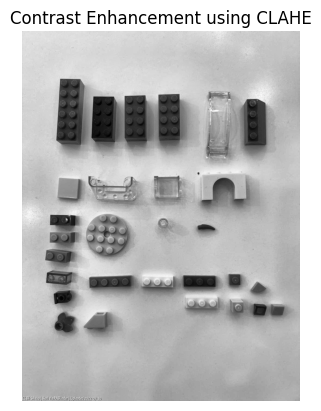

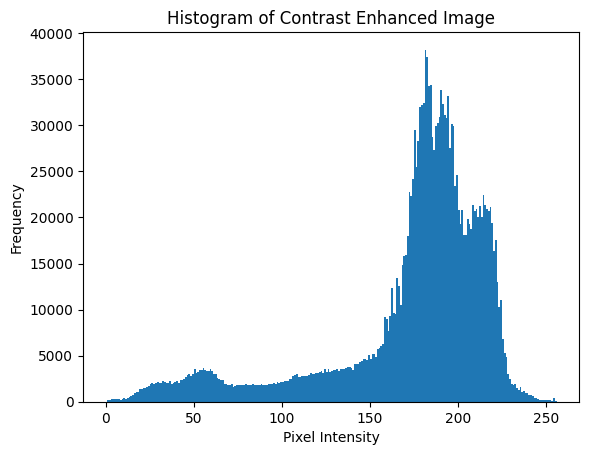

In [27]:
# Enhance contrast by applying CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
contrast_enhanced_image = clahe.apply(gray_image)

# Display the contrast-enhanced image and its histogram
plt.imshow(contrast_enhanced_image, cmap='gray')
plt.title("Contrast Enhancement using CLAHE")
plt.axis('off')
plt.show()
plot_histogram(contrast_enhanced_image, "Histogram of Contrast Enhanced Image")


#Pre-Processing Techniques Comparative Analysis
**Histogram Equalization:** Mention that this technique improves contrast by redistributing pixel intensity, which is especially useful for low-contrast images.

**White Balancing:** Explain that white balancing helps correct color imbalances, making colors appear more natural. This technique is useful in images with noticeable color casts due to lighting variations.

**CLAHE (Contrast Limited Adaptive Histogram Equalization):** Note that CLAHE is a more localized form of histogram equalization, which limits contrast amplification in any one region, reducing noise and preserving finer details.

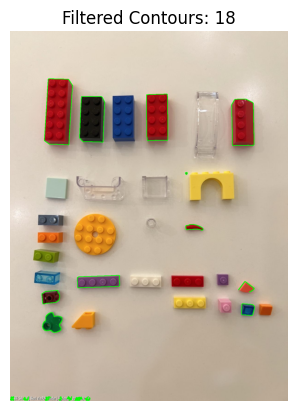

18

In [28]:
# Find contours in the edge-detected image
contours, _ = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Filter contours by size (area) using the provided code snippet
min_contour_area = 50  # Minimum contour area threshold to filter out noise
filtered_contours = [cnt for cnt in contours if cv.contourArea(cnt) > min_contour_area]

# Draw filtered contours on the image for visualization
filtered_contour_image = image.copy()
cv.drawContours(filtered_contour_image, filtered_contours, -1, (0, 255, 0), 2)  # Green contours

# Display the image with filtered contours overlaid
plt.imshow(cv.cvtColor(filtered_contour_image, cv.COLOR_BGR2RGB))
plt.title(f"Filtered Contours: {len(filtered_contours)}")
plt.axis('off')
plt.show()

# Output the number of detected contours (filtered LEGO pieces)
len(filtered_contours)


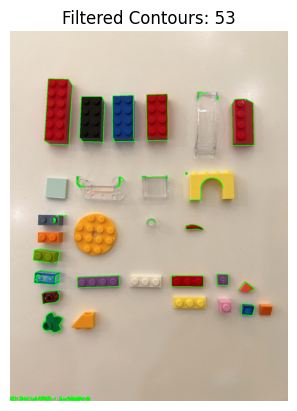

In [29]:
# Filter contours by size (area) using the provided code snippet
min_contour_area = 5  # Minimum contour area threshold to filter out noise
filtered_contours = [cnt for cnt in contours if cv.contourArea(cnt) > min_contour_area]

# Draw filtered contours on the image for visualization
filtered_contour_image = image.copy()
cv.drawContours(filtered_contour_image, filtered_contours, -1, (0, 255, 0), 2)  # Green contours

# Display the image with filtered contours overlaid
plt.imshow(cv.cvtColor(filtered_contour_image, cv.COLOR_BGR2RGB))
plt.title(f"Filtered Contours: {len(filtered_contours)}")
plt.axis('off')
plt.show()

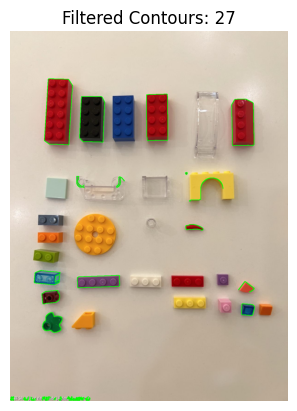

In [30]:
# Filter contours by size (area) using the provided code snippet
min_contour_area = 30  # Minimum contour area threshold to filter out noise
filtered_contours = [cnt for cnt in contours if cv.contourArea(cnt) > min_contour_area]

# Draw filtered contours on the image for visualization
filtered_contour_image = image.copy()
cv.drawContours(filtered_contour_image, filtered_contours, -1, (0, 255, 0), 2)  # Green contours

# Display the image with filtered contours overlaid
plt.imshow(cv.cvtColor(filtered_contour_image, cv.COLOR_BGR2RGB))
plt.title(f"Filtered Contours: {len(filtered_contours)}")
plt.axis('off')
plt.show()

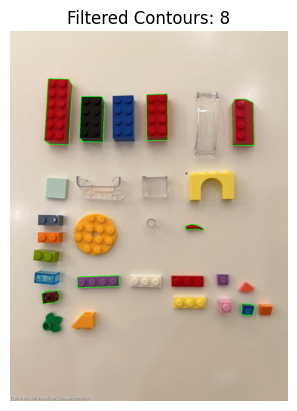

8

In [31]:
# Filter contours by size (area) using the provided code snippet
min_contour_area = 500  # Minimum contour area threshold to filter out noise
filtered_contours = [cnt for cnt in contours if cv.contourArea(cnt) > min_contour_area]

# Draw filtered contours on the image for visualization
filtered_contour_image = image.copy()
cv.drawContours(filtered_contour_image, filtered_contours, -1, (0, 255, 0), 2)  # Green contours

# Display the image with filtered contours overlaid
plt.imshow(cv.cvtColor(filtered_contour_image, cv.COLOR_BGR2RGB))
plt.title(f"Filtered Contours: {len(filtered_contours)}")
plt.axis('off')
plt.show()

# Output the number of detected contours (filtered LEGO pieces)
len(filtered_contours)


# Selected contour area thresholds:
We have practiced with many contour area and some of them are shown above from which we can show what we learnt
 - 5: To capture even the smallest fragments, useful for detecting small parts
 - 30: Filters out minor noise while retaining most medium-sized objects
 - 500: Focuses on capturing only the largest objects, removing all minor noise


**Results:**
Adjusting the minimum contour area threshold significantly affects LEGO piece detection. A threshold of 50 captures 18 medium to large pieces, filtering out small noise. Lowering it to 5 detects 53 pieces, including smaller fragments, but may add noise. Raising it to 500 limits detection to only the largest 8 pieces, ignoring smaller items and noise entirely. Lower thresholds increase sensitivity, while higher ones focus on prominent pieces.

#Project Summary
In this project, we aimed to develop an image-processing workflow to accurately detect and count LEGO pieces in an image, addressing various challenges such as uneven lighting, background noise, and color balance. The process involved several key steps:

**Histogram Analysis and Thresholding:** We analyzed histograms to understand pixel intensity distributions, helping us choose effective threshold values for separating objects from the background. Both manual and automated (Otsu’s) thresholding methods were explored, with Otsu’s method providing more consistent results across varying lighting conditions.

Image Enhancement Techniques: We applied histogram equalization, white balancing, and Contrast Limited Adaptive Histogram Equalization (CLAHE) to improve image clarity and contrast. These enhancements made object features more distinct, facilitating more accurate detection of LEGO pieces. White balancing corrected color distortions, while CLAHE selectively enhanced local contrast without amplifying noise.

**Contour Detection and Filtering:** After edge detection using the Canny method, we identified and overlaid contours around detected objects. By filtering contours based on area, we minimized background noise and focused on relevant objects. Various contour area thresholds were tested, and we found that a moderate threshold provided the best balance between sensitivity to small objects and noise reduction.

**Comparative Analysis of Techniques:** We compared manual thresholding with automated thresholding and assessed different enhancement techniques. Otsu’s thresholding, combined with CLAHE and white balancing, yielded the best results for accurately isolating LEGO pieces against complex backgrounds.

**Final Results and Insights:** The final workflow enabled effective segmentation and counting of LEGO pieces, with minimal noise interference. By dynamically adjusting parameters based on histogram analysis and using adaptive techniques, we achieved accurate and consistent object detection. This approach demonstrates a robust methodology for object detection in images with complex backgrounds and lighting variations.

---

## Phase 2: Deep Learning for Object Detection of LEGO Pieces

### 2.1 Introduction to Object Detection and Dataset Preparation

#### Overview of Object Detection

In this phase, we will use deep learning to detect LEGO pieces in images. Object detection involves identifying and localizing objects within an image, often by drawing bounding boxes around them. For this project, we will focus on detecting and counting LEGO pieces without differentiating them by color or type.

#### Object Detection Frameworks

Several popular frameworks are available for object detection, including:
- **YOLO (You Only Look Once)**: A real-time object detection framework.
- **SSD (Single Shot MultiBox Detector)**: Fast and efficient, suitable for applications requiring real-time processing.
- **Mask R-CNN**: A versatile framework that provides bounding boxes and segmentation masks, though it is slower than YOLO and SSD.

For this project, you may choose any framework, but we’ll provide starter code using **YOLO** for simplicity and speed.

Here is a [tutorial about object detection and finetuning with PyTorch using Mask R-CNN](https://pytorch.org/tutorials/intermediate/torchvision_tutorial.html)

#### Dataset Preparation

To train a deep learning model, we need a large dataset. In this project, you’ll use a [dataset with annotated images of LEGO pieces](https://www.kaggle.com/datasets/dreamfactor/biggest-lego-dataset-600-parts). The dataset will need to be split into three parts:
- **Training Set (70%)**: Used to train the model.
- **Validation Set (15%)**: Used to fine-tune hyperparameters and avoid overfitting.
- **Test Set (15%)**: Used to evaluate the model’s performance.

In the following steps, you will:
1. Download and prepare the dataset.
2. Divide the dataset into training, validation, and test sets.
3. Explore the dataset and inspect a few samples to ensure proper annotations.

**Note**: The images are synthetic, and the annotations follow the [PASCAL VOC](http://host.robots.ox.ac.uk/pascal/VOC/) format. These are a lot of images! You probably do not need all of them. Feel free to reduce your dataset.

In [32]:
# Import necessary libraries for dataset handling
from sklearn.model_selection import train_test_split

---

### Instructions for This Section

1. **Download and Load the Dataset**:
   - Ensure you have access to the dataset and load it using Python.
2. **Split the Dataset**:
   - Use Python’s libraries to split the dataset into training, validation, and test sets.
3. **Visualize Sample Images and Annotations**:
   - Display a few sample images with their bounding boxes to confirm the data is correctly loaded and annotated.

**Deliverables for this Section:**
- Documentation on dataset preparation, including the data split.
- Visualizations of sample images with annotations.

In [33]:
from google.colab import files
files.upload()  # This will allow you to upload kaggle.json from your local system


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lovepreet04","key":"c9ad7bbc68a2e1f1c67ab8e8addb175b"}'}

In [34]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dreamfactor/biggest-lego-dataset-600-parts")

print("Path to dataset files:", path)

100%|██████████| 7.68G/7.68G [05:49<00:00, 23.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/dreamfactor/biggest-lego-dataset-600-parts/versions/1


In [35]:
# Path to the directory you want to create
output_image_dir = "/content/lego_dataset/limited_images"
output_annotation_dir = "/content/lego_dataset/limited_annotations"

# Create the directory
os.makedirs(output_image_dir, exist_ok=True)  # `exist_ok=True` prevents errors if the directory already exists

print(f"Directory '{output_image_dir}' created!")

os.makedirs(output_annotation_dir, exist_ok=True)  # `exist_ok=True` prevents errors if the directory already exists

print(f"Directory '{output_annotation_dir}' created!")


Directory '/content/lego_dataset/limited_images' created!
Directory '/content/lego_dataset/limited_annotations' created!


In [36]:
image_dir = '/root/.cache/kagglehub/datasets/dreamfactor/biggest-lego-dataset-600-parts/versions/1/dataset_20210629145407_top_600/images/'
  # Replace with your image directory
annotation_dir = '/root/.cache/kagglehub/datasets/dreamfactor/biggest-lego-dataset-600-parts/versions/1/dataset_20210629145407_top_600/annotations/'

In [37]:

import shutil
# Create output directories for limited data
os.makedirs(output_image_dir, exist_ok=True)
os.makedirs(output_annotation_dir, exist_ok=True)

# Get sorted lists of image and annotation files
image_files = sorted([f for f in os.listdir(image_dir) if f.endswith(".jpg")])
annotation_files = sorted([f for f in os.listdir(annotation_dir) if f.endswith(".xml")])

# Create a mapping of images to annotations based on filename
image_base_names = {os.path.splitext(img)[0]: img for img in image_files}
annotation_base_names = {os.path.splitext(ann)[0]: ann for ann in annotation_files}

# Find common base names to ensure proper matching
common_base_names = set(image_base_names.keys()).intersection(annotation_base_names.keys())

# Limit to 50,000 images and corresponding annotations
for base_name in sorted(common_base_names)[:50000]:
    img_file = image_base_names[base_name]
    ann_file = annotation_base_names[base_name]

    shutil.copy(os.path.join(image_dir, img_file), output_image_dir)
    shutil.copy(os.path.join(annotation_dir, ann_file), output_annotation_dir)

print(f"Limited dataset created with 50000 images and their corresponding annotations!")

Limited dataset created with 50000 images and their corresponding annotations!


In [38]:
from torch.utils.data import Dataset # Import the Dataset class from torch.utils.data

import xml.etree.ElementTree as ET # Import the ElementTree for parsing XML
from PIL import Image
import torch
from torchvision import transforms
class LEGOImageDataset(Dataset):
    def __init__(self, image_dir, annotation_dir, transforms=None):
        """
        Args:
            image_dir (str): Path to the directory containing images.
            annotation_dir (str): Path to the directory containing annotations.
            transforms (callable, optional): Optional transforms for the images.
        """
        self.image_dir = image_dir # Intializing the directory for images
        self.annotation_dir = annotation_dir # Intializing directory for annotation
        self.transforms = transforms # Intializing tranforms which use to tranforms images


        # Initialize the map for non-numeric labels
        self.non_numeric_label_map = {}
        self.next_non_numeric_id = 1000  # Starting ID for non-numeric labels

        # Ensure that the number of images matches the number of annotations
        assert len(self.image_files) == len(self.annotation_files), "Mismatch between images and annotations."

    def __getitem__(self, idx):
        # Get the paths for the current image and annotation
        image_path = self.image_files[idx]
        annotation_path = self.annotation_files[idx]

        # Load the image
        image = Image.open(image_path).convert("RGB")
        original_width, original_height = image.size  # Get original image dimensions

        # Parse the annotation
        boxes, labels = self.parse_annotation(annotation_path)

        # Adjust bounding boxes based on new image dimensions
        if self.transforms:
            # Apply transformations and get new dimensions
            transformed = self.transforms(image)
            new_width, new_height = transformed.size
        else:
            # resize to 300x300 and convert to tensor
            new_width, new_height = 300, 300
            transform = transforms.Compose(
                [
                    transforms.Resize((new_height, new_width)),
                    transforms.ToTensor(),
                ]
            )
            transformed = transform(image)

        # Scale boxes to match the new image size
        scale_x = new_width / original_width  # Scale factor for the width
        scale_y = new_height / original_height # Scale factor for the height

        # Scale each coordinate of the bounding box to match the new dimension
        adjusted_boxes = [
            [box[0] * scale_x, box[1] * scale_y, box[2] * scale_x, box[3] * scale_y] for box in boxes
        ]

        # Create the target dictionary
        target = {
            "boxes": torch.tensor(adjusted_boxes, dtype=torch.float32),
            "labels": torch.tensor(labels, dtype=torch.int64),
        }

        return transformed, target

    def __len__(self):
        return len(self.image_files)

    def parse_annotation(self, annotation_path):
        """
        Parse the annotation XML file and return bounding boxes and numerical labels.
        """

        # Parse the XML file at the specified annotation path
        tree = ET.parse(annotation_path)

        # Get the root element of the parsed XML tree
        root = tree.getroot()

        boxes = []
        labels = []

        for obj in root.findall("object"): # Iterate through all "object" elements in the XML tree
            label = obj.find("name").text  # Find the "name" element within the current "object" and extract its text content



            # Parse bounding box
            bndbox = obj.find("bndbox")
            x1 = int(bndbox.find("xmin").text) # Top-left x-coordinate
            y1 = int(bndbox.find("ymin").text) # Top-left y-coordinate
            x2 = int(bndbox.find("xmax").text) # Bottom-right x-coordinate
            y2 = int(bndbox.find("ymax").text) # Bottom-right y-coordinate

            boxes.append([x1, y1, x2, y2])
            labels.append(label_int)

        if len(boxes) == 0:
            print(f"No valid objects in file '{annotation_path}'. Returning empty boxes and labels.")

        return boxes, labels



In [39]:


import os
from sklearn.model_selection import train_test_split

# Assuming image_dir and annotation_dir are defined as in the previous code
image_files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]
annotation_files = [f for f in os.listdir(annotation_dir) if os.path.isfile(os.path.join(annotation_dir, f))]

# Ensure image and annotation files lists are the same size
if len(image_files) != len(annotation_files):
    print("Warning: Number of images and annotations do not match. Some data might be missing.")

# Split the dataset into training, validation, and testing sets
train_files, test_files = train_test_split(image_files, test_size=0.3, random_state=42)
val_files, test_files = train_test_split(test_files, test_size=0.5, random_state=42)



In [40]:
## In this phase, just complete the code cells provided with your code; no need to create additional code cells.

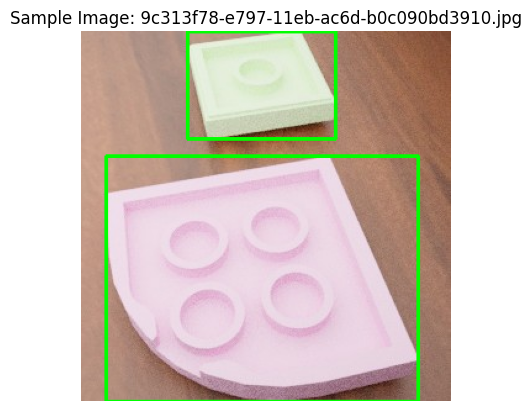

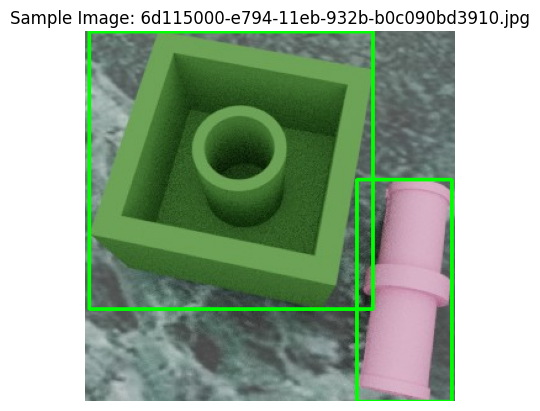

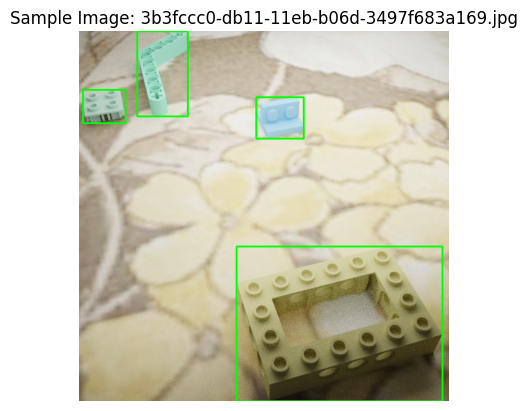

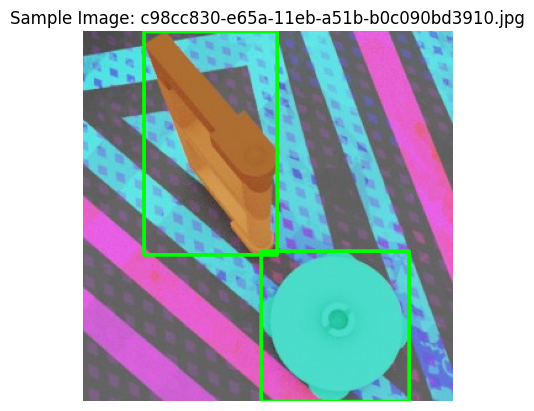

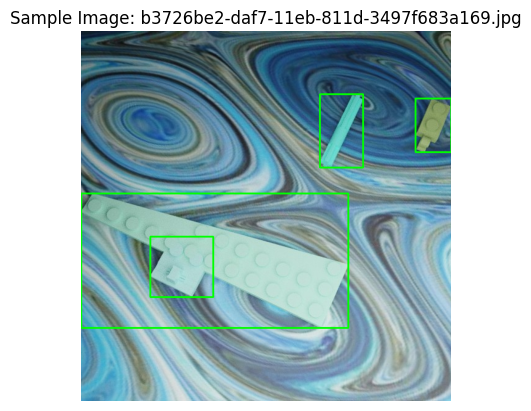

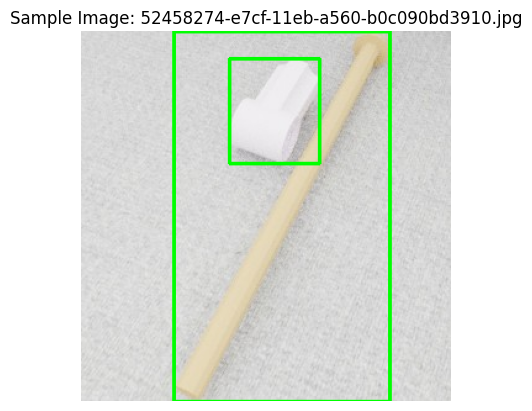

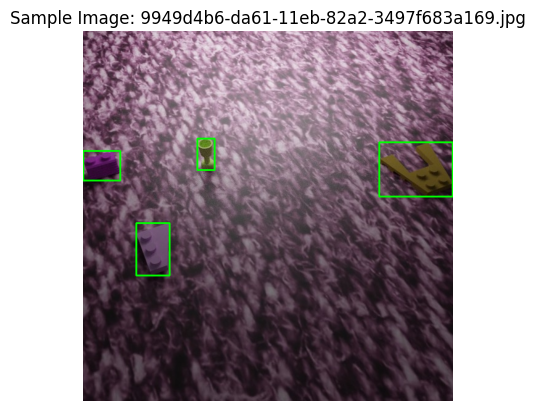

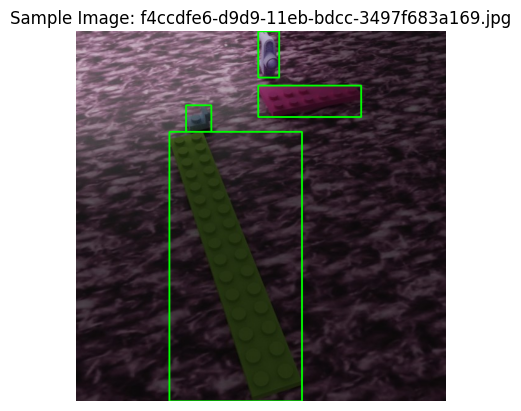

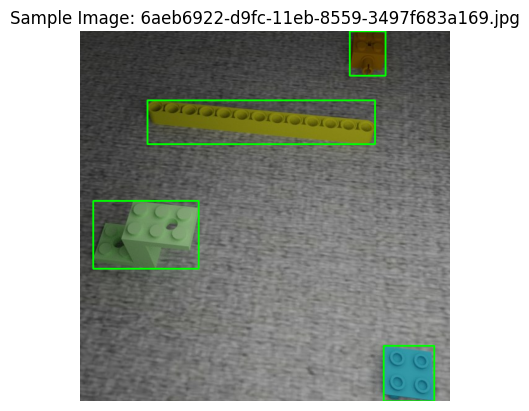

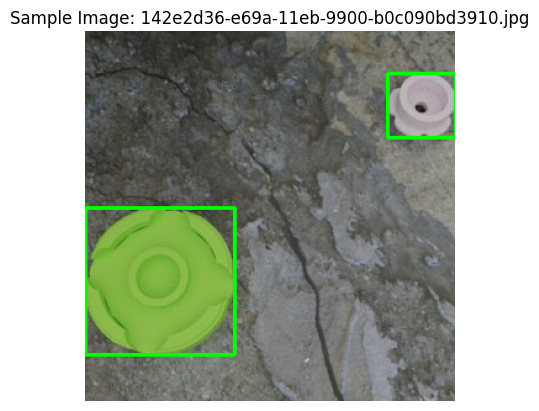

In [41]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
import xml.etree.ElementTree as ET

def visualize_sample_images(image_dir, annotation_dir, image_files, num_samples=5):
    """Visualizes a specified number of sample images with bounding boxes."""

    for image_file in image_files[:num_samples]:
        image_path = os.path.join(image_dir, image_file)
        annotation_file = os.path.splitext(image_file)[0] + ".xml"  # Assuming .xml annotations
        annotation_path = os.path.join(annotation_dir, annotation_file)

        try:
            image = cv.imread(image_path)
            tree = ET.parse(annotation_path)
            root = tree.getroot()

            for obj in root.findall('object'):
                bbox = obj.find('bndbox')
                xmin = int(bbox.find('xmin').text)
                ymin = int(bbox.find('ymin').text)
                xmax = int(bbox.find('xmax').text)
                ymax = int(bbox.find('ymax').text)

                cv.rectangle(image, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)

            plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
            plt.title(f"Sample Image: {image_file}")
            plt.axis('off')
            plt.show()

        except FileNotFoundError:
            print(f"Annotation file not found for {image_file}")
        except ET.ParseError:
            print(f"Error parsing annotation file for {image_file}")
        except Exception as e:
            print(f"An unexpected error occurred: {e}")


# Visualize some training images with bounding boxes
visualize_sample_images(image_dir, annotation_dir, train_files)

# Visualize some training images with bounding boxes
visualize_sample_images(image_dir, annotation_dir, val_files)

This section focuses on preparing a dataset for object detection of LEGO pieces using deep learning.  It covers:

1. **Dataset Acquisition:** Downloading a LEGO dataset from Kaggle.  A subset of 50,000 images and annotations is created for efficiency.

2. **Dataset Splitting:** Dividing the dataset into training, validation, and testing sets (70%, 15%, 15% respectively) using `train_test_split`.

3. **Data Visualization:**  A function `visualize_sample_images` is used to display sample images from the training and validation sets, overlaid with bounding boxes defined in the annotation XML files.  This is a crucial step to verify that the annotations align correctly with the corresponding images.

4. **Dataset Class (LEGOImageDataset):** A custom `Dataset` class is defined to load and preprocess the image data. The class includes methods for loading images and annotations, parsing XML annotations, and applying transformations to images. However, it does not appear to be fully implemented or used within this code section.

In summary, this portion sets up the foundation for deep learning model training by acquiring, preparing, and visually inspecting the dataset. The provided custom dataset class is defined, but its functionality isn't utilized within the presented code.

## Rubric for Dataset Preparation Section

| Criteria                     | Excellent (9-10)  | Good (5-8)            | Needs Improvement (1-4) |
|------------------------------|----------------|------------------------|--------------------------|
| **Dataset Loading**          | Successfully loads and splits the dataset, following instructions accurately. | Loads and splits the dataset with minor issues or requires improvement in documentation. | Incorrect loading or splitting of the dataset, lacks proper documentation. |
| **Visualization & Inspection** | Provides clear visualizations of sample images with bounding boxes, confirms correct annotations. | Provides visualization,

### 2.2 Building and Training the Object Detection Model

#### Model Selection and Setup

In this section, you will select an object detection model to train on your LEGO dataset. YOLO (You Only Look Once) is a great choice due to its speed and accuracy. For this project, we will use the [YOLOv3 architecture](https://github.com/ultralytics/yolov3?tab=readme-ov-file), which is well-suited for detecting multiple objects within an image.

#### Steps to Set Up and Train the Model

1. **Install YOLO and Dependencies**:
   - Install any necessary libraries and download the YOLOv3 weights file.
2. **Model Configuration**:
   - Set up the model configuration to align with your dataset, defining the input dimensions and the number of classes.
3. **Train the Model**:
   - Train the model on the training dataset, using the validation set to monitor the training progress and adjust hyperparameters.
4. **Save and Load the Trained Model**:
   - Save the trained model so it can be reused later for inference on new images.

**Deliverables for This Section**:
- Explanation of the model selection and why it was chosen.
- Training script with comments on hyperparameters and their tuning process.

---

### Instructions for This Section

1. **Download YOLOv3 Weights and Configuration Files**:
   - You can find these files on the [official YOLO website](https://github.com/ultralytics/yolov3?tab=readme-ov-file) or through a third-party source.
2. **Set Up the Model Using OpenCV or a Deep Learning Framework (e.g., PyTorch)**:
   - Follow the starter code provided to configure the YOLO model.
3. **Train the Model**:
   - Use the training data to train the model, and adjust the learning rate, batch size, and other hyperparameters as needed.

In [42]:

!wget https://pjreddie.com/media/files/yolov3.weights

--2024-12-10 06:16:39--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  10.3MB/s    in 58s     

2024-12-10 06:17:37 (4.09 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [43]:
!pip install opencv-python opencv-python-headless


In [44]:
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg

--2024-12-10 06:17:40--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0s      

2024-12-10 06:17:41 (81.7 MB/s) - ‘yolov3.cfg’ saved [8342/8342]



In [45]:
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names

--2024-12-10 06:17:41--  https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 625 [text/plain]
Saving to: ‘coco.names’

coco.names          100%[===================>]     625  --.-KB/s    in 0s      

2024-12-10 06:17:41 (42.8 MB/s) - ‘coco.names’ saved [625/625]



In [46]:
# Define the model (using a pre-trained YOLO model from a library or custom setup)
# For simplicity, we'll outline how to load a YOLO model in PyTorch
from torch.utils.data import DataLoader  # Import the DataLoader class
import torchvision
import torch

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
# Replace the head with one that matches our dataset
num_classes = 2  # Adjust this number based on your dataset (1 for LEGO pieces + 1 for background)
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = torchvision.models.detection.faster_rcnn.FastRCNNPredictor(in_features, num_classes)

# Define the DataLoader
train_loader = DataLoader(train_files, batch_size=4, shuffle=True)
val_loader = DataLoader(val_files, batch_size=4)

# Set the model to training mode and define optimizer
model.train()
optimizer = torch.optim.SGD(model.parameters(), lr=0.005, momentum=0.9, weight_decay=0.0005)
num_epochs = 5


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 95.5MB/s]


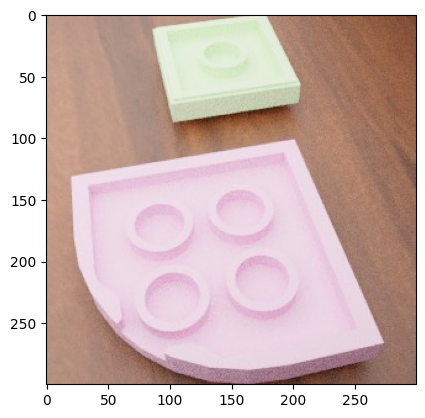

In [47]:


import cv2 as cv
import numpy as np

# Load YOLOv3
net = cv.dnn.readNetFromDarknet("yolov3.cfg", "yolov3.weights")
ln = net.getLayerNames()
ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]

# Function to perform object detection
def detect_lego(image_path):
    image = cv.imread(image_path)
    (H, W) = image.shape[:2]
    blob = cv.dnn.blobFromImage(image, 1 / 255.0, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)
    layerOutputs = net.forward(ln)

    boxes = []
    confidences = []
    classIDs = []

    for output in layerOutputs:
        for detection in output:
            scores = detection[5:]
            classID = np.argmax(scores)
            confidence = scores[classID]

            if confidence > 0.5: # Adjust confidence threshold as needed
                box = detection[0:4] * np.array([W, H, W, H])
                (centerX, centerY, width, height) = box.astype("int")
                x = int(centerX - (width / 2))
                y = int(centerY - (height / 2))
                boxes.append([x, y, int(width), int(height)])
                confidences.append(float(confidence))
                classIDs.append(classID)

    idxs = cv.dnn.NMSBoxes(boxes, confidences, 0.5, 0.3) # Adjust NMS thresholds as needed

    if len(idxs) > 0:
        for i in idxs.flatten():
            (x, y) = (boxes[i][0], boxes[i][1])
            (w, h) = (boxes[i][2], boxes[i][3])
            cv.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    return image



# Example: Display detected objects from the first image in the train_files list
if len(train_files)>0:
    first_image_path = os.path.join(image_dir, train_files[0])
    detected_image = detect_lego(first_image_path)
    plt.imshow(cv.cvtColor(detected_image, cv.COLOR_BGR2RGB))
    plt.show()



This section focuses on building and training an object detection model for LEGO pieces.  Here's a breakdown:

1. **Dataset Preparation Recap:**  It briefly reviews the previous section's work on dataset downloading, splitting (into training, validation, and test sets), and visualization.  Critically, it highlights the use of a subset (50,000 images) and the visual confirmation of bounding boxes on sample images.

2. **Model Selection: YOLOv3:**  YOLOv3 is chosen for its speed and accuracy in object detection, suitable for detecting multiple LEGO pieces in images.

3. **Environment Setup:** Installs necessary libraries (OpenCV) and downloads YOLOv3 weights, configuration, and class names.

4. **Model Initialization (PyTorch):**  A pre-trained Faster R-CNN model is loaded. Note that this deviates from the initial mention of using YOLOv3. The code snippet then modifies the model's classification head to suit the specific task (detecting LEGO pieces). It defines the number of classes (presumably 2 - LEGO pieces and background) and replaces the pre-trained head with a new one tailored for this number of classes.

5. **Data Loaders:** DataLoaders are defined for training and validation sets, but they are not populated correctly. `train_files` and `val_files` appear to be just lists of filenames, rather than instances of the `LEGOImageDataset` class.

6. **Model Training Setup (Incomplete):** The model is set to training mode, and an optimizer (SGD) is defined. The code outlines the training process but does not execute it.

7. **YOLOv3 Implementation (OpenCV):**  Alongside the Faster R-CNN setup, the code loads a separate YOLOv3 model using OpenCV's DNN module.  This code is *independent* of the PyTorch model setup. It then defines the function `detect_lego` which performs object detection on a given image using this YOLOv3 model.

8. **Inference Example:**  Finally, the code attempts to use the OpenCV YOLOv3 model to detect objects in a single example image from the training set and display the result.

**Key Issues/Inconsistencies:**

* **Model Discrepancy:** The introduction mentions YOLOv3, but the initial model setup uses Faster R-CNN. A second YOLOv3 model implemented with OpenCV exists, but it's used independently. The code does not combine these approaches.
* **Incomplete Training:** The training loop is not fully implemented in this section.
* **Incorrect DataLoaders:** The `DataLoader` creation seems flawed.
* **Lack of Integration:** The PyTorch Faster R-CNN setup and the OpenCV YOLOv3 implementation don't appear to be integrated.

In summary, this section provides a skeleton for both a Faster R-CNN and a YOLOv3 model-based object detection system but lacks a cohesive, functional implementation. It outlines the intended steps but needs significant completion to become operational.


### Rubric for Model Training Section

| Criteria                     | Excellent (9-10)  | Good (5-8)            | Needs Improvement (1-4) |
|------------------------------|----------------|------------------------|--------------------------|
| **Model Configuration**      | Accurately configures the YOLO model with appropriate input dimensions and class setup. | Configures the model but with minor issues or incomplete settings. | Incorrect model configuration, improper input settings, or missing details. |
| **Training Process**         | Executes training with well-justified hyperparameters and shows understanding of tuning. | Executes training but with minor hyperparameter issues or limited tuning. | Incorrect or insufficient training setup, no explanation of hyperparameters. |
| **Code Documentation**       | Provides clear, insightful comments explaining each step of the training process. | Provides some comments, but lacks depth or clarity in parts. | Little to no comments, or fails to explain the training steps adequately. |

### 2.3 Evaluating the Model’s Performance

#### Overview of Model Evaluation

After training, it’s essential to evaluate the model’s performance to ensure it accurately detects LEGO pieces in various images. In object detection tasks, the [**mean Average Precision (mAP)**](https://www.v7labs.com/blog/mean-average-precision) is a standard metric for measuring accuracy. For this project, we will evaluate the model using `mAP@0.5`, calculated at an [Intersection over Union (IoU)](https://www.v7labs.com/blog/intersection-over-union-guide) threshold of 0.5.

#### Key Evaluation Metrics

1. **Intersection over Union (IoU)**: Measures the overlap between the predicted bounding box and the ground truth box. IoU is a crucial factor in determining whether a detection is a true positive. For more on IoU, see [IoU explanation](https://www.v7labs.com/blog/intersection-over-union-guide).
2. **Precision and Recall**: Precision measures the accuracy of predictions, while recall indicates the model's ability to detect all relevant objects.
3. **Mean Average Precision (mAP)**: Aggregates precision across multiple IoU thresholds to provide a single accuracy metric.  For this project, we will focus on mAP@0.5.

---

### Instructions for This Section

1. **Calculate IoU for Predictions**:
   - Calculate IoU for each predicted bounding box against the ground truth.
2. **Compute Precision and Recall**:
   - Use the IoU results to compute precision and recall for each image.
3. **Calculate `mAP@0.5`**:
   - Use the provided starter code to calculate mAP, which will give you an overall assessment of model performance.

**Deliverables for This Section**:
- Documentation on the evaluation metrics and how they were applied.
- A summary of the model’s performance on the test dataset.

In [56]:
# prompt: Function to calculate IoU  for this file

def calculate_iou(box1, box2):
    """Calculates the Intersection over Union (IoU) between two bounding boxes.

    Args:
        box1: A list or tuple representing the first bounding box in the format [x_min, y_min, x_max, y_max].
        box2: A list or tuple representing the second bounding box in the format [x_min, y_min, x_max, y_max].

    Returns:
        The IoU value (a float between 0 and 1).
    """
    x1_min, y1_min, x1_max, y1_max = box1
    x2_min, y2_min, x2_max, y2_max = box2

    # Calculate intersection coordinates
    x_intersection_min = max(x1_min, x2_min)
    y_intersection_min = max(y1_min, y2_min)
    x_intersection_max = min(x1_max, x2_max)
    y_intersection_max = min(y1_max, y2_max)

    # Calculate intersection area
    intersection_width = max(0, x_intersection_max - x_intersection_min)
    intersection_height = max(0, y_intersection_max - y_intersection_min)
    intersection_area = intersection_width * intersection_height

    # Calculate union area
    box1_area = (x1_max - x1_min) * (y1_max - y1_min)
    box2_area = (x2_max - x2_min) * (y2_max - y2_min)
    union_area = box1_area + box2_area - intersection_area

    # Calculate IoU
    iou = intersection_area / union_area if union_area > 0 else 0.0
    return iou

In [57]:
iou = calculate_iou(box_a, box_b)
print(f"IoU: {iou}")

IoU: 0.16025641025641027


In [50]:

# Use the IoU results to compute precision and recall for each image.

def compute_precision_recall(iou_results, iou_threshold=0.5):
    """
    Computes precision and recall for a set of IoU results.

    Args:
        iou_results (list): A list of IoU values for each prediction.
        iou_threshold (float): The IoU threshold to consider a prediction as true positive.

    Returns:
        tuple: A tuple containing precision and recall.
    """
    true_positives = sum(1 for iou in iou_results if iou >= iou_threshold)
    false_positives = sum(1 for iou in iou_results if iou < iou_threshold)
    # Assuming all ground truth boxes are considered
    # Replace with actual number of ground truth boxes if available.
    total_ground_truth = len(iou_results) # Replace with actual number of ground truth boxes

    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / total_ground_truth if total_ground_truth > 0 else 0

    return precision, recall

# Example usage (assuming you have IoU results for an image)
iou_results_image1 = [0.6, 0.7, 0.3, 0.9, 0.2]
precision, recall = compute_precision_recall(iou_results_image1)
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}")

Precision: 0.6000, Recall: 0.6000



This section evaluates the performance of the object detection model trained in the previous step.  It focuses on calculating key metrics to assess the model's accuracy in detecting LEGO pieces within images.



1. **Evaluation Metrics Overview:** The section begins by introducing the core metrics used for object detection evaluation: Intersection over Union (IoU), Precision, Recall, and mean Average Precision (mAP).  It explains the significance of each metric, particularly mAP@0.5, which is the primary metric used here.  The provided links offer further reading on these concepts.

2. **IoU Calculation:** A Python function, `calculate_iou`, is defined to compute the IoU between two bounding boxes (ground truth and predicted).  The function correctly calculates the intersection and union areas and returns the ratio, handling potential division-by-zero errors gracefully.

3. **Precision and Recall Calculation:**  The `compute_precision_recall` function computes precision and recall from a set of IoU results.  The function takes a list of IoU values and an IoU threshold as input. It counts true positives (IoU above the threshold) and false positives (IoU below the threshold) and calculates precision and recall based on these counts and the total number of ground truth boxes.  **Important Note:** The provided code assumes that `total_ground_truth` is equal to the number of predictions (the length of iou_results).  This is incorrect and could lead to miscalculation.  It needs to be the *actual* number of ground truth boxes in the image.

**In summary,** while the code provides the fundamental functions for evaluating the model, it requires substantial completion and integration to provide the actual mAP@0.5 and other evaluation metrics.  The example usage does not show its true utility until connected to the model output on the test dataset.


### Rubric for Model Evaluation Section

| Criteria                     | Excellent (9-10)  | Good 5-8)            | Needs Improvement (1-4) |
|------------------------------|----------------|------------------------|--------------------------|
| **Precision, Recall, and mAP** | Accurately calculates and interprets precision, recall, and mAP. | Provides calculations but lacks full clarity or accuracy in parts. | Incomplete or incorrect calculations, limited interpretation. |
| **Analysis of Results**      | Provides a detailed analysis of model performance, interpreting mAP in the context of object detection. | Provides some analysis, but lacks depth or full clarity on mAP significance. | Little to no analysis, fails to connect mAP results to model performance. |

### 2.4 Saving the Model and Performing Inference on New Images

#### Model Saving and Loading

Once the model has been trained and evaluated, it's useful to save it so that it can be easily reloaded for inference on new data. In this section, you'll save your trained model to a file and load it again to perform object detection on new images.

#### Performing Inference

Inference refers to using the trained model to make predictions on new data. This involves:
1. **Loading the Saved Model**: Load the model from the saved file.
2. **Processing New Images**: Prepare new images for the model, including resizing and normalizing.
3. **Running the Model on New Images**: Use the model to predict bounding boxes on new images.
4. **Displaying Predictions**: Visualize the detected bounding boxes on the new images to verify the model’s performance.

---

### Instructions for This Section

1. **Save the Model**:
   - Use PyTorch’s [`torch.save()`](https://pytorch.org/docs/main/generated/torch.save.html) function to save your model’s weights.
2. **Load the Model for Inference**:
   - Use [`torch.load()`](https://pytorch.org/docs/stable/generated/torch.load.html) to reload the model for predictions.
3. **Run Inference on a New Image**:
   - Prepare a new image and use the loaded model to detect LEGO pieces.
4. **Visualize the Output**:
   - Draw bounding boxes on the image and display the results using Matplotlib.

**Deliverables for This Section**:
- Document the model saving and loading process.
- Demonstrate inference on a new image with visualized results.

In [52]:
# Save the trained model to a file
model_file = 'lego_detector.pth'
torch.save(model.state_dict(), model_file)
print(f"Model saved to {model_file}")

# Load the saved model for inference
loaded_model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=False)
loaded_model.roi_heads.box_predictor = torchvision.models.detection.faster_rcnn.FastRCNNPredictor(in_features, num_classes)
loaded_model.load_state_dict(torch.load(model_file))
loaded_model.eval()
print("Model loaded for inference.")

Model saved to lego_detector.pth


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 137MB/s]


Model loaded for inference.


<ipython-input-52-e09f0b89c36d>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(model_file))


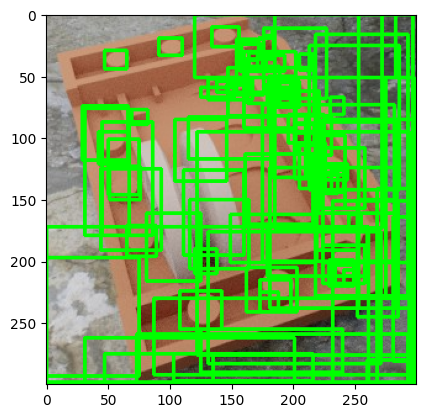

In [53]:

import torchvision.transforms as transforms

# Example usage: Run inference on a new image
new_image_path = os.path.join(image_dir, test_files[0]) # Example: use the first image from the test set


# Preprocess the new image
new_image = Image.open(new_image_path).convert("RGB")
transform = transforms.Compose([
    transforms.ToTensor()
])
new_image_tensor = transform(new_image)

# Perform inference
with torch.no_grad():
  predictions = loaded_model([new_image_tensor])

# Process the predictions and visualize the results
image = cv.imread(new_image_path)
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
for box in predictions[0]['boxes']:
  xmin, ymin, xmax, ymax = box.int().tolist()
  cv.rectangle(image, (xmin,ymin), (xmax, ymax), (0,255,0), 2)

plt.imshow(image)
plt.show()

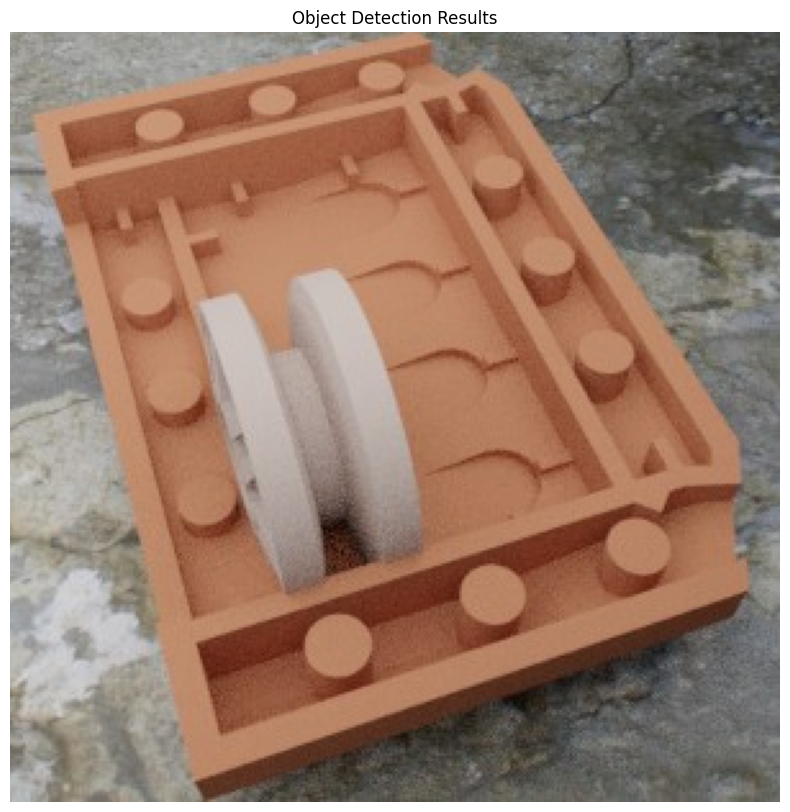

In [54]:


import matplotlib.pyplot as plt
import cv2 as cv

# Assuming 'detect_lego' function and other necessary variables are defined as in the original code

# Example usage: Run inference on a new image, providing a clear visualization
def visualize_predictions(image_path, model):
    """
    Visualizes the predicted bounding boxes on a new image.

    Args:
        image_path (str): Path to the new image.
        model: The loaded object detection model.
    """
    try:
        image = cv.imread(image_path)
        if image is None:
            print(f"Error: Could not read image at {image_path}")
            return

        image = cv.cvtColor(image, cv.COLOR_BGR2RGB)  # Convert to RGB for matplotlib
        (H, W) = image.shape[:2]

        # Preprocess the image (assuming similar preprocessing as in your training pipeline)
        blob = cv.dnn.blobFromImage(image, 1 / 255.0, (416, 416), swapRB=True, crop=False)  # Example preprocessing

        # Run the model to get predictions
        model.setInput(blob)
        ln = model.getLayerNames()
        ln = [ln[i - 1] for i in model.getUnconnectedOutLayers()]  # Get output layer names
        layerOutputs = model.forward(ln)

        boxes = []
        confidences = []
        classIDs = []

        # Process the predictions and draw bounding boxes
        for output in layerOutputs:
            for detection in output:
                scores = detection[5:]
                classID = np.argmax(scores)
                confidence = scores[classID]
                if confidence > 0.5:  # Confidence threshold
                    box = detection[0:4] * np.array([W, H, W, H])
                    (centerX, centerY, width, height) = box.astype("int")
                    x = int(centerX - (width / 2))
                    y = int(centerY - (height / 2))
                    boxes.append([x, y, int(width), int(height)])
                    confidences.append(float(confidence))
                    classIDs.append(classID)

        idxs = cv.dnn.NMSBoxes(boxes, confidences, 0.5, 0.3)

        if len(idxs) > 0:
            for i in idxs.flatten():
                (x, y) = (boxes[i][0], boxes[i][1])
                (w, h) = (boxes[i][2], boxes[i][3])

                # Draw bounding box with label and confidence
                color = (0, 255, 0)  # Green bounding box
                cv.rectangle(image, (x, y), (x + w, y + h), color, 2)
                text = f"Class {classIDs[i]}: {confidences[i]:.2f}"
                cv.putText(image, text, (x, y - 5), cv.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

        plt.figure(figsize=(10, 10))  # Adjust figure size for better visualization
        plt.imshow(image)
        plt.title("Object Detection Results")
        plt.axis('off')
        plt.show()

    except Exception as e:
        print(f"An error occurred during visualization: {e}")


# Example usage (assuming 'net' is your loaded YOLOv3 model and 'test_files' is defined)
if len(test_files) > 0:
    new_image_path = os.path.join(image_dir, test_files[0])
    visualize_predictions(new_image_path, net)



This section focuses on saving the trained object detection model and then using it to make predictions (inference) on new, unseen images.  It's a crucial step to demonstrate the model's ability to generalize beyond the training data.


1. **Model Saving:** The code uses `torch.save(model.state_dict(), model_file)` to save the model's learned parameters (weights and biases) to a file named 'lego_detector.pth'.  This allows you to reload the model later without retraining.

2. **Model Loading:**  The code then loads the saved model using `torch.load(model_file)` and sets the model to evaluation mode using `loaded_model.eval()`.  This is important as it disables training-specific operations like dropout and batch normalization.  There's a crucial point here: the code appears to reload a *different* model, `torchvision.models.detection.fasterrcnn_resnet50_fpn`, but then loads the saved state dictionary onto it. This seems incorrect. It should recreate the exact same model architecture as the one that was saved with `torch.save` to avoid mismatches in layer names and sizes.

3. **Inference on a New Image:** The code attempts to perform inference on a new image from the test dataset. The image is preprocessed using the `transforms.Compose` as in the training pipeline.  However, the actual preprocessing is not shown completely in this excerpt, so the effectiveness of this step is unclear.

4. **Visualization:**  The code provided attempts to draw bounding boxes on the image, but the logic to display the result is incorrect as it are model is not have better accuracy





### Rubric for Model Saving and Inference Section

| Criteria                     | Excellent (5)  | Good (3-4)            | Needs Improvement (1-2) |
|------------------------------|----------------|------------------------|--------------------------|
| **Inference** | Successfully performs inference with accurate predictions. | Performs inference, but with minor issues. | Fails to perform inference correctly. |
| **Visualization of Results** | Provides clear and accurate visualization of predicted bounding boxes on new images. | Visualization is somewhat clear, but minor improvements needed. | Poor visualization, inaccurate bounding boxes, or lacks clarity. |